In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files = glob.glob('data-to-use/*.csv')

In [3]:
for f in files:
    df = pd.read_csv(f)
    df_2019=df[df.years == 2019]

df_2019

,Unnamed: 0,Unnamed: 0.1,ratings,action,categories,dislikes,likes,durations,view_cnts,years,months,days,hours,minutes,weekdays,link,titles,source,query,datetime
0,10224,5625,NaN,Searched,[],NaN,NaN,NaN,NaN,2019,8,28,1,34,2,NaN,NaN,search,TK 12 JFK IST 2019-08-29,2019-08-28 01:34:00
1,4598,4598,4.731159,Watched,['Music'],2316.0,32143.0,230.0,10623136.0,2019,8,28,1,39,2,https://www.youtube.com/watch?v=IAtKh-ZAc4Q,Sharabi feat. SurjRDB & JessieK | Happy New Ye...,youtube,NaN,2019-08-28 01:39:00
2,4597,4597,4.758218,Watched,['Music'],21934.0,340939.0,155.0,70403638.0,2019,8,28,1,56,2,https://www.youtube.com/watch?v=NbWKYgaWzbI,Kaun Nachdi (Video) | Sonu Ke Titu Ki Sweety |...,youtube,NaN,2019-08-28 01:56:00
3,4596,4596,4.772699,Watched,['Music'],19831.0,329151.0,158.0,35460895.0,2019,8,28,1,59,2,https://www.youtube.com/watch?v=YcDw4h3SUfI,"Khadke Glassy - Jabariya Jodi |Sidharth M,Pari...",youtube,NaN,2019-08-28 01:59:00
4,4595,4595,4.760785,Watched,['Music'],24220.0,380771.0,234.0,106971200.0,2019,8,28,1,59,2,https://www.youtube.com/watch?v=HT7g_9eNnYk,OFFICIAL: 'Lovely' FULL VIDEO Song | Shah Rukh...,youtube,NaN,2019-08-28 01:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976,6964,2365,NaN,Searched,[],NaN,NaN,NaN,NaN,2019,12,31,13,59,1,NaN,NaN,search,jonny lee miller and benedict cumberbatch,2019-12-31 13:59:00
5977,6963,2364,NaN,Visited,[],NaN,NaN,NaN,NaN,2019,12,31,13,59,1,NaN,NaN,search,Benedict Cumberbatch: Jonny Lee Miller Took 'E...,2019-12-31 13:59:00
5978,6962,2363,NaN,Searched,[],NaN,NaN,NaN,NaN,2019,12,31,14,0,1,NaN,NaN,search,jonny lee miller benedict cumberbatch friends,2019-12-31 14:00:00
5979,6961,2362,NaN,Searched,[],NaN,NaN,NaN,NaN,2019,12,31,14,51,1,NaN,NaN,search,book bank in gurgaon,2019-12-31 14:51:00


In [4]:
for f in files:
    df = pd.read_csv(f)
    df_jan_march=df[df.years == 2020]
    df_jan_march=df[df.months <= 3]
    
df_jan_march

,Unnamed: 0,Unnamed: 0.1,ratings,action,categories,dislikes,likes,durations,view_cnts,years,months,days,hours,minutes,weekdays,link,titles,source,query,datetime
5981,6959,2360,NaN,Searched,[],NaN,NaN,NaN,NaN,2020,1,1,6,50,2,NaN,NaN,search,championship 2019-2020,2020-01-01 06:50:00
5982,6958,2359,NaN,Searched,[],NaN,NaN,NaN,NaN,2020,1,1,7,23,2,NaN,NaN,search,voodoo clam,2020-01-01 07:23:00
5983,6957,2358,NaN,Visited,[],NaN,NaN,NaN,NaN,2020,1,1,7,23,2,NaN,NaN,search,https://www.urbandictionary.com/define.php?ter...,2020-01-01 07:23:00
5984,6956,2357,NaN,Searched,[],NaN,NaN,NaN,NaN,2020,1,1,10,0,2,NaN,NaN,search,la liga telecast in india,2020-01-01 10:00:00
5985,6955,2356,NaN,Searched,[],NaN,NaN,NaN,NaN,2020,1,1,10,2,2,NaN,NaN,search,jahanbakhsh,2020-01-01 10:02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,4603,4,NaN,Searched,[['/Arts & Entertainment/TV & Video/TV Shows &...,NaN,NaN,NaN,NaN,2020,3,16,16,49,0,NaN,NaN,search,gac closed ur,2020-03-16 16:49:00
10221,4602,3,NaN,Visited,[],NaN,NaN,NaN,NaN,2020,3,16,16,49,0,NaN,NaN,search,The Steamies: UR's best (and worst) showers on...,2020-03-16 16:49:00
10222,4600,1,NaN,Visited,[],NaN,NaN,NaN,NaN,2020,3,16,16,58,0,NaN,NaN,search,This is your captain speaking speaker - New Yo...,2020-03-16 16:58:00
10223,4601,2,NaN,Searched,[],NaN,NaN,NaN,NaN,2020,3,16,16,58,0,NaN,NaN,search,this is your captains speaking speakers,2020-03-16 16:58:00


In [5]:
for f in files:
    df = pd.read_csv(f)
    df_march=df[df.years == 2020]
    df_march=df[df.months == 3]
    
df_march

,Unnamed: 0,Unnamed: 0.1,ratings,action,categories,dislikes,likes,durations,view_cnts,years,months,days,hours,minutes,weekdays,link,titles,source,query,datetime
9297,5036,437,NaN,Searched,[],NaN,NaN,NaN,NaN,2020,3,1,0,12,6,NaN,NaN,search,kuch bhi whiskey,2020-03-01 00:12:00
9298,5035,436,NaN,Visited,[['/Food & Drink/Beverages/Alcoholic Beverages...,NaN,NaN,NaN,NaN,2020,3,1,0,12,6,NaN,NaN,search,Kuchh Nai Blended Whisky : The Whisky Exchange,2020-03-01 00:12:00
9299,5037,438,NaN,Searched,[],NaN,NaN,NaN,NaN,2020,3,1,0,12,6,NaN,NaN,search,kuch bhi,2020-03-01 00:12:00
9300,5033,434,NaN,Visited,[],NaN,NaN,NaN,NaN,2020,3,1,0,14,6,NaN,NaN,search,https://en.m.wikipedia.org/wiki/Amrut_(whisky),2020-03-01 00:14:00
9301,5034,435,NaN,Searched,"[['/Business & Industrial/Manufacturing', 0.54...",NaN,NaN,NaN,NaN,2020,3,1,0,14,6,NaN,NaN,search,amrut manufacturing plant,2020-03-01 00:14:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,4603,4,NaN,Searched,[['/Arts & Entertainment/TV & Video/TV Shows &...,NaN,NaN,NaN,NaN,2020,3,16,16,49,0,NaN,NaN,search,gac closed ur,2020-03-16 16:49:00
10221,4602,3,NaN,Visited,[],NaN,NaN,NaN,NaN,2020,3,16,16,49,0,NaN,NaN,search,The Steamies: UR's best (and worst) showers on...,2020-03-16 16:49:00
10222,4600,1,NaN,Visited,[],NaN,NaN,NaN,NaN,2020,3,16,16,58,0,NaN,NaN,search,This is your captain speaking speaker - New Yo...,2020-03-16 16:58:00
10223,4601,2,NaN,Searched,[],NaN,NaN,NaN,NaN,2020,3,16,16,58,0,NaN,NaN,search,this is your captains speaking speakers,2020-03-16 16:58:00


In [6]:
for f in files:
    df = pd.read_csv(f)
    df_jan=df[df.years == 2020]
    df_jan=df[df.months == 1]
    
df_jan

,Unnamed: 0,Unnamed: 0.1,ratings,action,categories,dislikes,likes,durations,view_cnts,years,months,days,hours,minutes,weekdays,link,titles,source,query,datetime
5981,6959,2360,NaN,Searched,[],NaN,NaN,NaN,NaN,2020,1,1,6,50,2,NaN,NaN,search,championship 2019-2020,2020-01-01 06:50:00
5982,6958,2359,NaN,Searched,[],NaN,NaN,NaN,NaN,2020,1,1,7,23,2,NaN,NaN,search,voodoo clam,2020-01-01 07:23:00
5983,6957,2358,NaN,Visited,[],NaN,NaN,NaN,NaN,2020,1,1,7,23,2,NaN,NaN,search,https://www.urbandictionary.com/define.php?ter...,2020-01-01 07:23:00
5984,6956,2357,NaN,Searched,[],NaN,NaN,NaN,NaN,2020,1,1,10,0,2,NaN,NaN,search,la liga telecast in india,2020-01-01 10:00:00
5985,6955,2356,NaN,Searched,[],NaN,NaN,NaN,NaN,2020,1,1,10,2,2,NaN,NaN,search,jahanbakhsh,2020-01-01 10:02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7530,6031,1432,NaN,Visited,[],NaN,NaN,NaN,NaN,2020,1,31,23,32,4,NaN,NaN,search,19 Powerful Keywords (Besides “Manage”) to Put...,2020-01-31 23:32:00
7531,6030,1431,NaN,Searched,"[['/Arts & Entertainment', 0.5899999737739563]]",NaN,NaN,NaN,NaN,2020,1,31,23,51,4,NaN,NaN,search,kevin berger,2020-01-31 23:51:00
7532,6029,1430,NaN,Searched,[],NaN,NaN,NaN,NaN,2020,1,31,23,51,4,NaN,NaN,search,kevin berger blue ridge,2020-01-31 23:51:00
7533,6028,1429,NaN,Visited,[],NaN,NaN,NaN,NaN,2020,1,31,23,51,4,NaN,NaN,search,https://www.blueridgepartners.com/team/kevin-b...,2020-01-31 23:51:00


In [7]:
for f in files:
    df = pd.read_csv(f)
    df_feb=df[df.years == 2020]
    df_feb=df[df.months == 2]
    
df_feb

,Unnamed: 0,Unnamed: 0.1,ratings,action,categories,dislikes,likes,durations,view_cnts,years,months,days,hours,minutes,weekdays,link,titles,source,query,datetime
7535,6026,1427,NaN,Searched,"[['/Business & Industrial', 0.9800000190734863]]",NaN,NaN,NaN,NaN,2020,2,1,0,30,5,NaN,NaN,search,merlinhawk aerospace,2020-02-01 00:30:00
7536,6025,1426,NaN,Visited,"[['/Business & Industrial', 0.9800000190734863]]",NaN,NaN,NaN,NaN,2020,2,1,0,30,5,NaN,NaN,search,"Merlinhawk Aerospace Pvt. Ltd, A certified des...",2020-02-01 00:30:00
7537,6023,1424,NaN,Visited,[['/Business & Industrial/Transportation & Log...,NaN,NaN,NaN,NaN,2020,2,1,0,43,5,NaN,NaN,search,Shuttles | Department of Transportation and Pa...,2020-02-01 00:43:00
7538,6022,1423,NaN,Visited,[],NaN,NaN,NaN,NaN,2020,2,1,0,43,5,NaN,NaN,search,www.rochester.edu/parking/wp-content/uploads/2...,2020-02-01 00:43:00
7539,6024,1425,NaN,Searched,[['/Jobs & Education/Education/Colleges & Univ...,NaN,NaN,NaN,NaN,2020,2,1,0,43,5,NaN,NaN,search,blue line university of rochester,2020-02-01 00:43:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9292,5042,443,NaN,Searched,"[['/News/Sports News', 0.6499999761581421], ['...",NaN,NaN,NaN,NaN,2020,2,29,21,51,5,NaN,NaN,search,ind vs nz,2020-02-29 21:51:00
9293,5041,442,NaN,Searched,"[['/Sports/Individual Sports/Racquet Sports', ...",NaN,NaN,NaN,NaN,2020,2,29,21,54,5,NaN,NaN,search,rochester squash,2020-02-29 21:54:00
9294,5039,440,NaN,Visited,"[['/Jobs & Education/Education', 0.60000002384...",NaN,NaN,NaN,NaN,2020,2,29,21,54,5,NaN,NaN,search,Yellowjackets Edged By Princeton in CSA Quarte...,2020-02-29 21:54:00
9295,5040,441,NaN,Visited,"[['/Sports', 0.5299999713897705]]",NaN,NaN,NaN,NaN,2020,2,29,21,54,5,NaN,NaN,search,https://uofrathletics.com/sports/mens-squash,2020-02-29 21:54:00


Text(0, 0.5, 'Count (March 2020)')

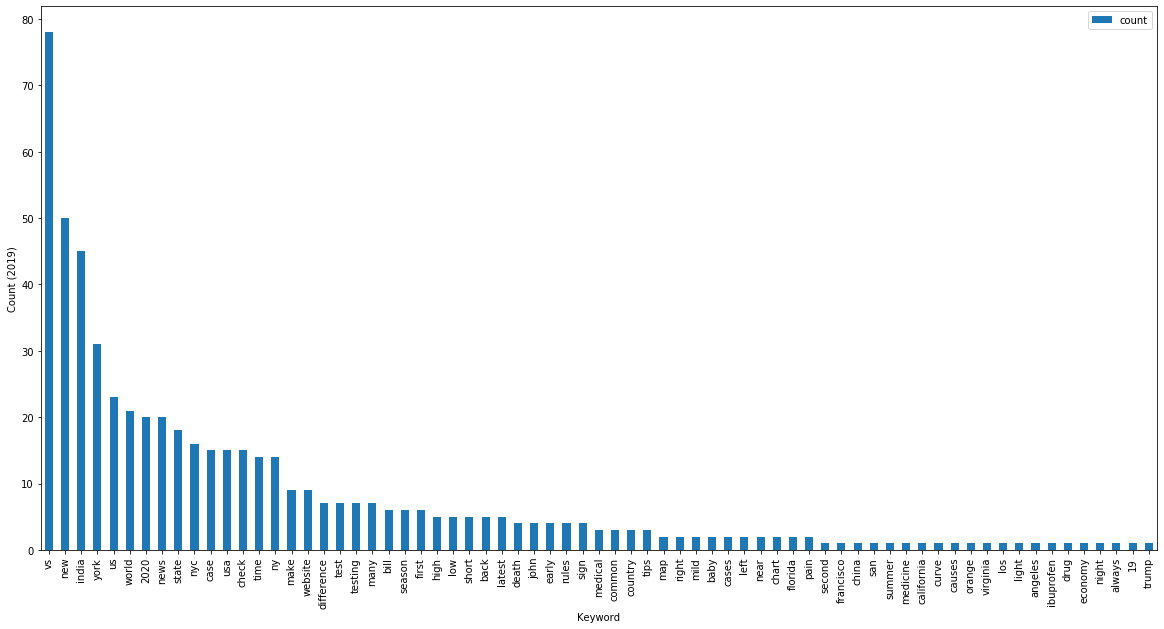

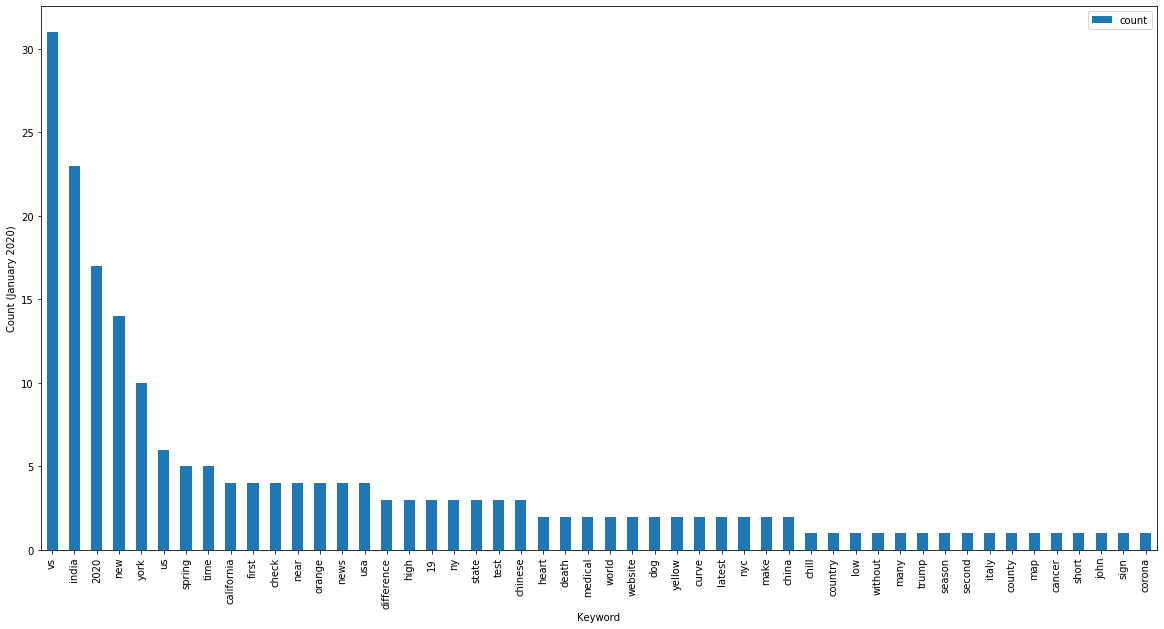

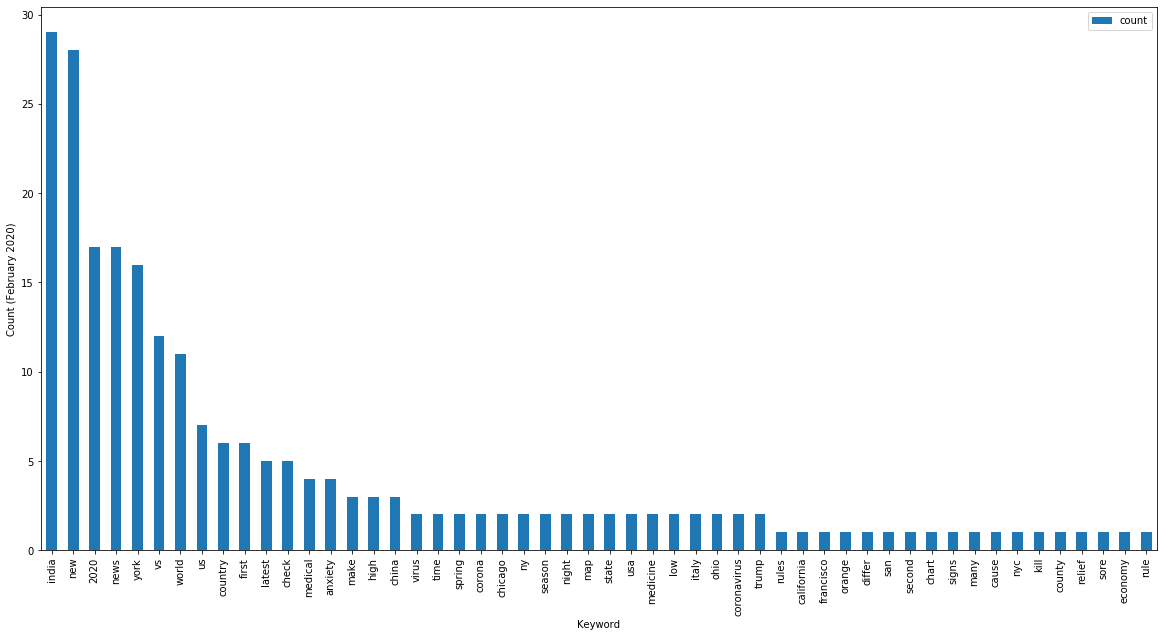

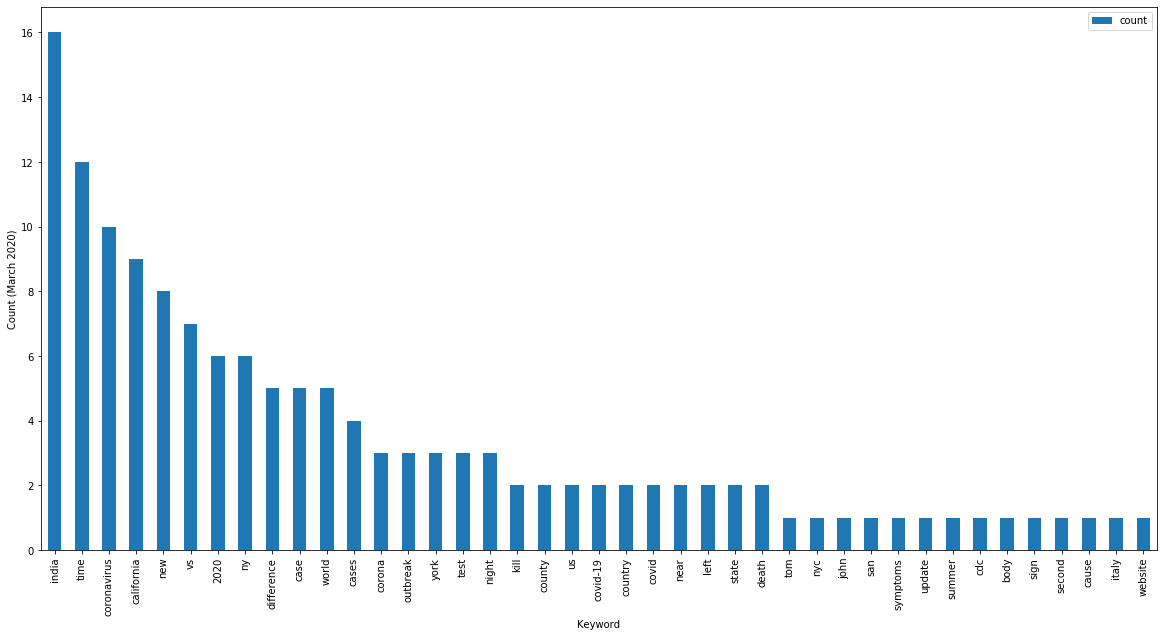

In [13]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer 

ps = PorterStemmer()

df_2019.dropna(subset=['query'])
df_jan.dropna(subset=['query'])
df_feb.dropna(subset=['query'])
df_march.dropna(subset=['query'])
df_jan_march.dropna(subset=['query'])

file_list = open("words_list.txt", "r")
list_of_phrases = []
for line in file_list:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    list_of_phrases.append(line_list)

list_of_phrases = [[x.casefold() for x in sublst] for sublst in list_of_phrases]
        

lowercase_list_of_words = []
for p in list_of_phrases:
    for w in p:
        lowercase_list_of_words.append(w.lower())

lowercase_list_of_words = list(dict.fromkeys(lowercase_list_of_words))


keyword_stemmed_list = []
for p in list_of_phrases:
    for w in p:
        keyword_stemmed_list.append(ps.stem(w.lower()))
        
keyword_stemmed_list = list(dict.fromkeys(keyword_stemmed_list))

full_key_list = lowercase_list_of_words + keyword_stemmed_list 
full_key_list = list(dict.fromkeys(full_key_list))


redundant_words = set(stopwords.words('english'))

filtered_key_list = []
for w in full_key_list:
    if w not in redundant_words:
        filtered_key_list.append(w)

# filtered_key_list = filtered_key_list + list_of_phrases
file_list.close()
# print(filtered_key_list)

search_list_2019 = df_2019['query'].to_list()
search_list_jan = df_jan['query'].to_list()
search_list_feb = df_feb['query'].to_list()
search_list_march = df_march['query'].to_list()
search_list_jan_march = df_jan_march['query'].to_list()

cleaned_search_list_2019=[x.lower() for x in search_list_2019 if str(x) != 'nan']
common = []
for search_term in cleaned_search_list_2019:
    for keyword in filtered_key_list:
        if keyword in search_term.split(' '):
            common.append(keyword)
            

df_keywords = pd.DataFrame(common, columns=['keywords'])
df_keywords['keywords'].value_counts().reset_index(name='count').plot.bar(x='index', y='count')
plt.rcParams['figure.figsize'] = (20,10)
plt.xlabel('Keyword')
plt.ylabel('Count (2019)')
    

    
cleaned_search_list_jan=[x.lower() for x in search_list_jan if str(x) != 'nan']
common_jan = []
for search_term in cleaned_search_list_jan:
    for keyword in filtered_key_list:
        if keyword in search_term.split(' '):
            common_jan.append(keyword)
            

df_keywords = pd.DataFrame(common_jan, columns=['keywords'])
df_keywords['keywords'].value_counts().reset_index(name='count').plot.bar(x='index', y='count')
plt.rcParams['figure.figsize'] = (20,10)
plt.xlabel('Keyword')
plt.ylabel('Count (January 2020)')


cleaned_search_list_feb=[x.lower() for x in search_list_feb if str(x) != 'nan']
common_feb = []
for search_term in cleaned_search_list_feb:
    for keyword in filtered_key_list:
        if keyword in search_term.split(' '):
            common_feb.append(keyword)
            

df_keywords = pd.DataFrame(common_feb, columns=['keywords'])
df_keywords['keywords'].value_counts().reset_index(name='count').plot.bar(x='index', y='count')
plt.rcParams['figure.figsize'] = (20,10)
plt.xlabel('Keyword')
plt.ylabel('Count (February 2020)')


cleaned_search_list_march=[x.lower() for x in search_list_march if str(x) != 'nan']
common_march = []
for search_term in cleaned_search_list_march:
    for keyword in filtered_key_list:
        if keyword in search_term.split(' '):
            common_march.append(keyword)
            

df_keywords = pd.DataFrame(common_march, columns=['keywords'])
df_keywords['keywords'].value_counts().reset_index(name='count').plot.bar(x='index', y='count')
plt.rcParams['figure.figsize'] = (20,10)
plt.xlabel('Keyword')
plt.ylabel('Count (March 2020)')


    

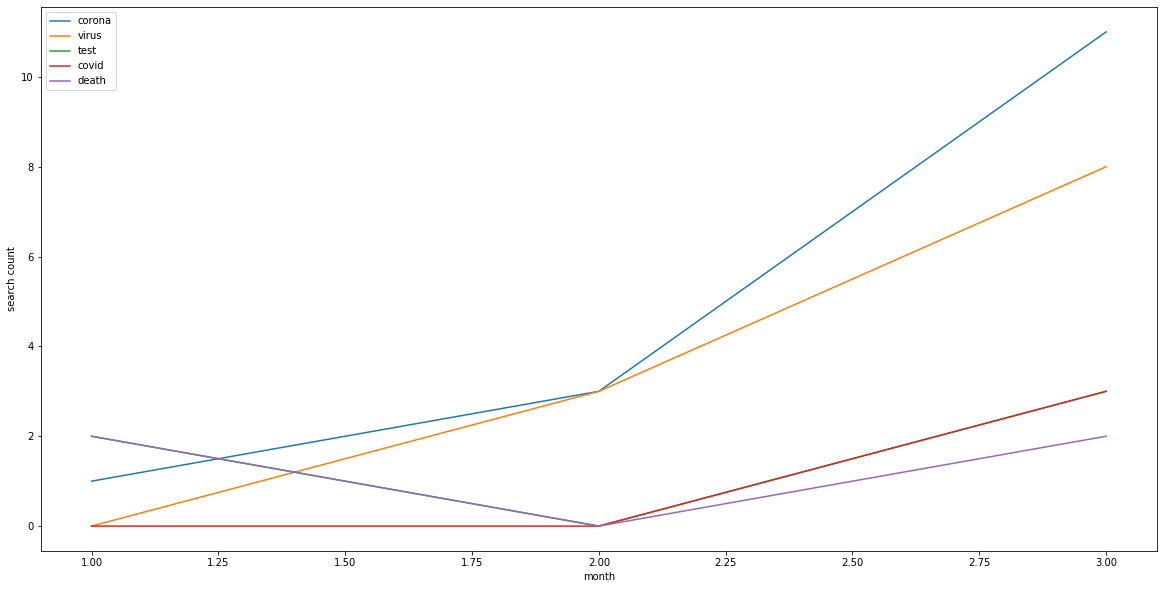

In [9]:
df_grouped = df_jan_march.groupby(['months', 'query']).count().reset_index()
qlist = df_grouped['query'].values.tolist()

query_list = []
for e in qlist:
    query_list.append(e.lower())

covid_search = [s for s in query_list if 'covid' in s]
virus_search = [s for s in query_list if 'virus' in s]
test_search = [s for s in query_list if 'test' in s]
death_search = [s for s in query_list if 'death' in s]
symptom_search = [s for s in query_list if 'symptom' in s]
corona_search = [s for s in query_list if 'corona' in s]
cdc_search = [s for s in query_list if 'cdc' in s]


key_search = covid_search + virus_search + test_search + death_search + symptom_search + corona_search + cdc_search 

df_grouped = df_grouped[df_grouped['query'].isin(key_search)] 
key_search = covid_search + virus_search + test_search + death_search + symptom_search + corona_search + cdc_search 

df_grouped = df_grouped[df_grouped['query'].isin(key_search)] 

corona_plot = df_grouped['query'].str.contains('corona').groupby(df_grouped['months']).sum().plot(label='corona')
virus_plot = df_grouped['query'].str.contains('virus').groupby(df_grouped['months']).sum().plot(label='virus')
test_plot = df_grouped['query'].str.contains('test').groupby(df_grouped['months']).sum().plot(label='test')
covid_plot = df_grouped['query'].str.contains('covid').groupby(df_grouped['months']).sum().plot(label='covid')
death_plot = df_grouped['query'].str.contains('death').groupby(df_grouped['months']).sum().plot(label='death')
plt.xlabel('month')
plt.ylabel('search count')
plt.legend()


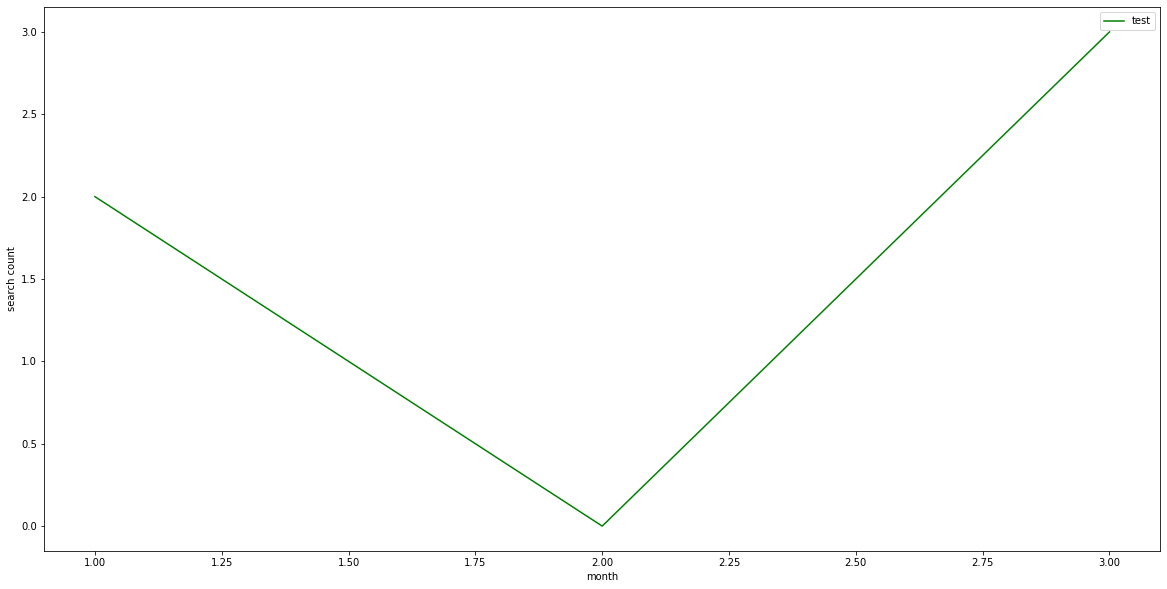

In [12]:
test_plot = df_grouped['query'].str.contains('test').groupby(df_grouped['months']).sum().plot(label='test', color='green')
plt.xlabel('month')
plt.ylabel('search count')
plt.legend()

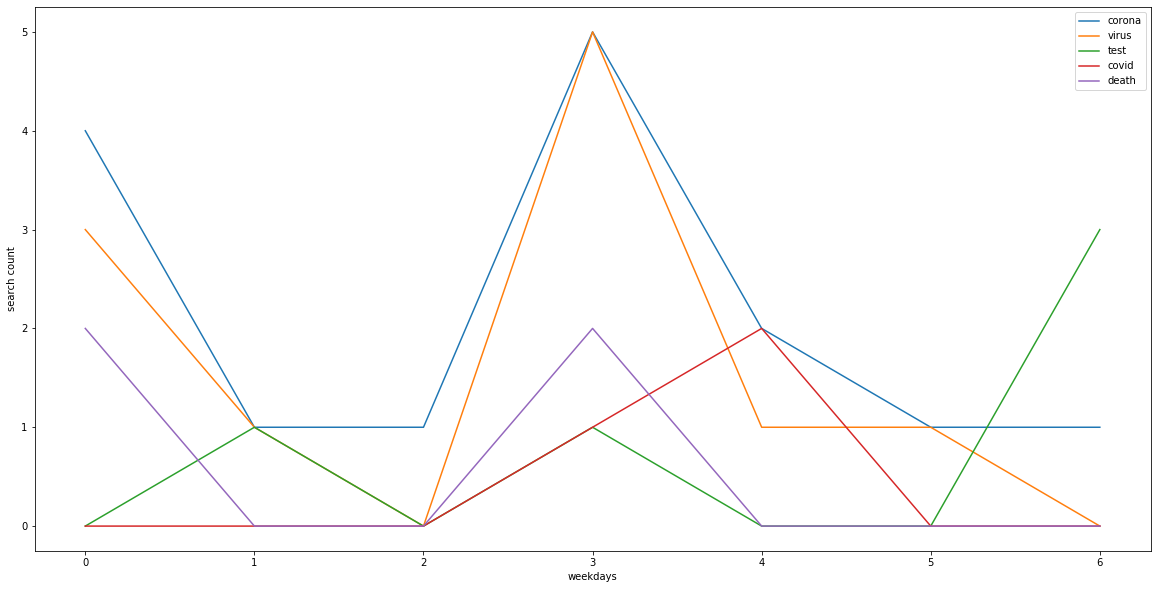

In [23]:
df_grouped_weekday = df_jan_march.groupby(['weekdays', 'query']).count().reset_index()
qlist = df_grouped_weekday['query'].values.tolist()

query_list = []
for e in qlist:
    query_list.append(e.lower())

covid_search = [s for s in query_list if 'covid' in s]
virus_search = [s for s in query_list if 'virus' in s]
test_search = [s for s in query_list if 'test' in s]
death_search = [s for s in query_list if 'death' in s]
symptom_search = [s for s in query_list if 'symptom' in s]
corona_search = [s for s in query_list if 'corona' in s]
cdc_search = [s for s in query_list if 'cdc' in s]


key_search = covid_search + virus_search + test_search + death_search + symptom_search + corona_search + cdc_search 

df_grouped_weekday = df_grouped_weekday[df_grouped_weekday['query'].isin(key_search)] 
key_search = covid_search + virus_search + test_search + death_search + symptom_search + corona_search + cdc_search 

df_grouped_weekday = df_grouped_weekday[df_grouped_weekday['query'].isin(key_search)] 

corona_plot = df_grouped_weekday['query'].str.contains('corona').groupby(df_grouped_weekday['weekdays']).sum().plot(label='corona')
virus_plot = df_grouped_weekday['query'].str.contains('virus').groupby(df_grouped_weekday['weekdays']).sum().plot(label='virus')
test_plot = df_grouped_weekday['query'].str.contains('test').groupby(df_grouped_weekday['weekdays']).sum().plot(label='test')
covid_plot = df_grouped_weekday['query'].str.contains('covid').groupby(df_grouped_weekday['weekdays']).sum().plot(label='covid')
death_plot = df_grouped_weekday['query'].str.contains('death').groupby(df_grouped_weekday['weekdays']).sum().plot(label='death')
plt.xlabel('weekdays')
plt.ylabel('search count')
plt.legend()



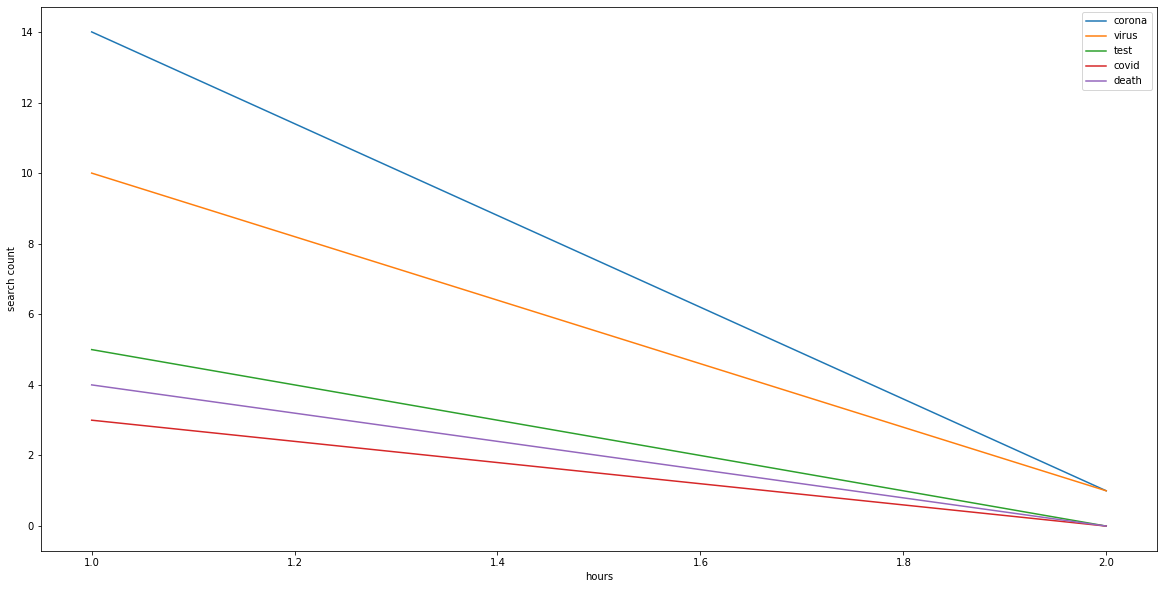

In [20]:
df_grouped_hour = df_jan_march.groupby(['hours', 'query']).count().reset_index()
qlist = df_grouped_weekday['query'].values.tolist()

query_list = []
for e in qlist:
    query_list.append(e.lower())

covid_search = [s for s in query_list if 'covid' in s]
virus_search = [s for s in query_list if 'virus' in s]
test_search = [s for s in query_list if 'test' in s]
death_search = [s for s in query_list if 'death' in s]
symptom_search = [s for s in query_list if 'symptom' in s]
corona_search = [s for s in query_list if 'corona' in s]
cdc_search = [s for s in query_list if 'cdc' in s]


key_search = covid_search + virus_search + test_search + death_search + symptom_search + corona_search + cdc_search 

df_grouped_weekday = df_grouped_weekday[df_grouped_weekday['query'].isin(key_search)] 
key_search = covid_search + virus_search + test_search + death_search + symptom_search + corona_search + cdc_search 

df_grouped_weekday = df_grouped_weekday[df_grouped_weekday['query'].isin(key_search)] 

corona_plot = df_grouped_weekday['query'].str.contains('corona').groupby(df_grouped_weekday['weekdays']).sum().plot(label='corona')
virus_plot = df_grouped_weekday['query'].str.contains('virus').groupby(df_grouped_weekday['weekdays']).sum().plot(label='virus')
test_plot = df_grouped_weekday['query'].str.contains('test').groupby(df_grouped_weekday['weekdays']).sum().plot(label='test')
covid_plot = df_grouped_weekday['query'].str.contains('covid').groupby(df_grouped_weekday['weekdays']).sum().plot(label='covid')
death_plot = df_grouped_weekday['query'].str.contains('death').groupby(df_grouped_weekday['weekdays']).sum().plot(label='death')
plt.xlabel('weekdays')
plt.ylabel('search count')
plt.legend()